### Data collecetd from Wikipedia on machine learning

In [90]:
# clean text data after removing parentheses and citations etc.
text = '''Machine learning is the study of computer algorithms that \
improve automatically through experience. It is seen as a \
subset of artificial intelligence. Machine learning algorithms \
build a mathematical model based on sample data, known as \
training data, in order to make predictions or decisions without \
being explicitly programmed to do so. Machine learning algorithms \
are used in a wide variety of applications, such as email filtering \
and computer vision, where it is difficult or infeasible to develop \
conventional algorithms to perform the needed tasks.'''

### String tokenization and words-indices look-up table creation

In [94]:
# text pre-processing using regular expressions

import re

def tokenize(text):
    pattern = re.compile(r'[A-Za-z]+[\w^\']*|[\w^\']*[A-Za-z]+[\w^\']*')
    return pattern.findall(text.lower())

In [96]:
# tokenization
tokens = tokenize(text)
tokens

['machine',
 'learning',
 'is',
 'the',
 'study',
 'of',
 'computer',
 'algorithms',
 'that',
 'improve',
 'automatically',
 'through',
 'experience',
 'it',
 'is',
 'seen',
 'as',
 'a',
 'subset',
 'of',
 'artificial',
 'intelligence',
 'machine',
 'learning',
 'algorithms',
 'build',
 'a',
 'mathematical',
 'model',
 'based',
 'on',
 'sample',
 'data',
 'known',
 'as',
 'training',
 'data',
 'in',
 'order',
 'to',
 'make',
 'predictions',
 'or',
 'decisions',
 'without',
 'being',
 'explicitly',
 'programmed',
 'to',
 'do',
 'so',
 'machine',
 'learning',
 'algorithms',
 'are',
 'used',
 'in',
 'a',
 'wide',
 'variety',
 'of',
 'applications',
 'such',
 'as',
 'email',
 'filtering',
 'and',
 'computer',
 'vision',
 'where',
 'it',
 'is',
 'difficult',
 'or',
 'infeasible',
 'to',
 'develop',
 'conventional',
 'algorithms',
 'to',
 'perform',
 'the',
 'needed',
 'tasks']

In [139]:
# short example text
#short_text = "cats and mice are buddies"
#short_tokens = tokenize(short_text)
#short_tokens

In [99]:
# creating a look-up table for words to indices and indices to words that will be useful for one-hot encoding
# map between token and indices

def mapping(tokens):
    word_to_id = {}
    id_to_word = {}
    
    for i, token in enumerate(set(tokens)):
        word_to_id[token] = i
        id_to_word[i] = token
    
    return word_to_id, id_to_word

In [100]:
word_to_id, id_to_word = mapping(tokens)
word_to_id

{'predictions': 0,
 'that': 1,
 'or': 2,
 'based': 3,
 'so': 4,
 'applications': 5,
 'such': 6,
 'wide': 7,
 'vision': 8,
 'infeasible': 9,
 'needed': 10,
 'in': 11,
 'sample': 12,
 'mathematical': 13,
 'decisions': 14,
 'order': 15,
 'learning': 16,
 'the': 17,
 'it': 18,
 'is': 19,
 'and': 20,
 'build': 21,
 'on': 22,
 'variety': 23,
 'where': 24,
 'difficult': 25,
 'seen': 26,
 'intelligence': 27,
 'explicitly': 28,
 'model': 29,
 'through': 30,
 'artificial': 31,
 'data': 32,
 'a': 33,
 'improve': 34,
 'being': 35,
 'are': 36,
 'used': 37,
 'subset': 38,
 'develop': 39,
 'algorithms': 40,
 'training': 41,
 'computer': 42,
 'without': 43,
 'as': 44,
 'tasks': 45,
 'programmed': 46,
 'do': 47,
 'machine': 48,
 'perform': 49,
 'automatically': 50,
 'email': 51,
 'study': 52,
 'make': 53,
 'of': 54,
 'conventional': 55,
 'experience': 56,
 'to': 57,
 'filtering': 58,
 'known': 59}

In [101]:
id_to_word

{0: 'predictions',
 1: 'that',
 2: 'or',
 3: 'based',
 4: 'so',
 5: 'applications',
 6: 'such',
 7: 'wide',
 8: 'vision',
 9: 'infeasible',
 10: 'needed',
 11: 'in',
 12: 'sample',
 13: 'mathematical',
 14: 'decisions',
 15: 'order',
 16: 'learning',
 17: 'the',
 18: 'it',
 19: 'is',
 20: 'and',
 21: 'build',
 22: 'on',
 23: 'variety',
 24: 'where',
 25: 'difficult',
 26: 'seen',
 27: 'intelligence',
 28: 'explicitly',
 29: 'model',
 30: 'through',
 31: 'artificial',
 32: 'data',
 33: 'a',
 34: 'improve',
 35: 'being',
 36: 'are',
 37: 'used',
 38: 'subset',
 39: 'develop',
 40: 'algorithms',
 41: 'training',
 42: 'computer',
 43: 'without',
 44: 'as',
 45: 'tasks',
 46: 'programmed',
 47: 'do',
 48: 'machine',
 49: 'perform',
 50: 'automatically',
 51: 'email',
 52: 'study',
 53: 'make',
 54: 'of',
 55: 'conventional',
 56: 'experience',
 57: 'to',
 58: 'filtering',
 59: 'known'}

### Generating Training Data

In [102]:
# function to concatinate two iterables generated by the range() in generate_training_data function

def concat(*iterables):
    for iterable in iterables:
        yield from iterable

In [103]:
# function for one-hot encoding of the input token sequence
# to represent each token as a vector

def one_hot_encode(id, vocab_size):
    res = [0] * vocab_size
    res[id] = 1
    return res

In [104]:
# the window size is two, which is why we look up to two words to the left and right of the input word
# iterate over the tokenized data and generate pairs

import numpy as np

np.random.seed(42)

def generate_training_data(tokens, word_to_id, window):
    X = []
    y = []
    n_tokens = len(tokens)
    
    for i in range(n_tokens):
        
        idx = concat(
            range(max(0, i - window), i), 
            range(i, min(n_tokens, i + window + 1))
        )
        for j in idx:
            if i == j:
                continue
            X.append(one_hot_encode(word_to_id[tokens[i]], len(word_to_id)))
            y.append(one_hot_encode(word_to_id[tokens[j]], len(word_to_id)))
    
    return np.asarray(X), np.asarray(y)

In [105]:
x=concat(range(0,1),range(1,4))
list(x)

[0, 1, 2, 3]

In [106]:
X, y = generate_training_data(tokens, word_to_id, 2)

In [107]:
X.shape

(330, 60)

In [108]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [109]:
y.shape

(330, 60)

In [110]:
y

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

- Both X and y are matrices with 330 rows and 60 columns. Here, 330 is the number of training examples we have. We would expect this number to have been larger had we used a larger window. 60 is the size of our corpus, or the number of unique tokens we have in the original text. Since we have one-hot encoded both the input and output as 60-dimensional sparse vectors, this is expected.

### The Embedding Model

- The input is a sparse vector containing one-hot encoded vectors, the weight matrix effectively acts as a lookup table that moves one-hot encoded vectors to dense vectors in a different dimension—more precisely, the row space of the weight matrix.

- First, embeddings are simply the rows of the first weight matrix, denoted as W1
- Through training and backpropgation, we adjust the weights of W1 along with the weight matrix in the second layer, denoted as W2, using cross entropy loss. 
- Overall, our model takes on the following structure: 
- **$A_{1}$ = $XW_{1}$**
- **$A_{2}$ = $A_{1}W_{2}$**
- **$Z = softmax(A_{2})$**      

In [115]:
# function to random initialization of two weight matrices
# it takes inputs as vocabulary size ie. total no of tokens and no of embedding
def init_network(vocab_size, n_embedding):
    model = {
        "w1": np.random.randn(vocab_size, n_embedding),
        "w2": np.random.randn(n_embedding, vocab_size)
    }
    return model

In [116]:
# specify model to create ten-dimensional embeddings. 
# In other words, each token will be represented as vectors living in ten-dimensional space.
model = init_network(len(word_to_id), 10)
model

{'w1': array([[ 1.25224503e-01, -4.29405541e-01,  1.22297503e-01,
          5.43298029e-01,  4.88600703e-02,  4.05916912e-02,
         -7.01991688e-01, -6.62900918e-01, -1.40260527e+00,
          1.74957674e+00],
        [-1.24386324e+00, -6.92905198e-01, -7.18407266e-01,
          8.94924377e-01, -2.94949678e-01,  1.24774207e+00,
         -6.73490624e-01,  2.78994162e-01, -8.35347053e-01,
          2.14514913e+00],
        [-1.18759842e+00,  3.09820710e-01,  6.33776881e-01,
          4.13799097e-01, -1.85287659e-01, -1.29820700e-01,
          4.38114720e-02, -1.47002002e-01,  9.63879117e-01,
          2.21052300e+00],
        [-5.57491785e-01, -1.36980298e+00, -8.82820484e-02,
          2.57970934e+00, -8.03674568e-01,  1.63911681e+00,
          1.67770081e+00, -5.53588242e-01,  5.68983079e-01,
          1.62839662e+00],
        [-3.79127741e-01, -2.03580360e-01, -5.81680914e-01,
         -1.01475673e+00, -6.49277545e-01, -1.22394027e+00,
          3.40834683e-02, -7.69973231e-01,  2.

In [134]:
model['w1'].shape, model['w2'].shape

((60, 10), (10, 60))

### Forward Propagation

- The output of the network is going to be some probability vector that passed through a softmax layer, not an embedding vector.

- This final output can be considered as context predictions, i.e. which words are likely to be in the window vicinity of the input word.

In [118]:
# implement the softmax() function receives a matrix as input, not a vector
# When the output is passed into this layer, it is converted into probability vectors whose elements sum up to one. 
# This final output can be considered as context predictions, 
# i.e. which words are likely to be in the window vicinity of the input word.
def softmax(X):
    res = []
    for x in X:
        exp = np.exp(x)
        res.append(exp / exp.sum())
    return res

- Representing words as dense vectors, a step-up from simple one-hot encoding. This process is exactly what embedding is: as we start training this model with the training data generated above, we would expect the row space of this weight matrix to encode meaningful semantic information from the training data.

- The second layer that receives as input the embeddings, then uses them to generate a set of outputs.

In [119]:
def forward(model, X, return_cache=True):
    cache = {}
    
    cache["a1"] = X @ model["w1"]
    cache["a2"] = cache["a1"] @ model["w2"]
    cache["z"] = softmax(cache["a2"])
    
    if not return_cache:
        return cache["z"]
    return cache

- For backpropagation, we will need all the intermediate variables, so we hold them in a dictionary called cache.
- However, if we simply want the final prediction vectors only, not the cache, we set return_cache to False

In [120]:
(X @ model["w1"]).shape

(330, 10)

- All the 330 tokens in the text to be converted into ten-dimensional vectors.

In [121]:
(X @ model["w1"] @ model["w2"]).shape

(330, 60)

- The output after second layer ($A_{2}$) is 60 dimensional, back to the original dimensions following one-hot encoding. This result can then be passed onto the softmax layer, the result of which will be a bunch probability vectors.

### Backpropagation

- In training—specifically error calculation and backpropagation—the prediction of probability vectors with its true one-hot encoded targets would be compared. The error function that we use with softmax is cross entropy.
- To keep a log of the value of the error throughout the backpropagation process, the final return value of backward() is set to be the cross entropy loss between the prediction and the target labels.
- The comparison between the prediction of softmax layer and target vector is $\frac{\partial L}{\partial A_{2}}$ = $Z-y$

In [125]:
def cross_entropy(z, y):
    return - np.sum(np.log(z) * y)

In [126]:
def backward(model, X, y, alpha):
    '''
    backpropagation function to update weights
    
    input: model with initial weights, training data X and y, learning rate of the network
    output: cross entropy loss between prediction and target labels
    '''
    cache  = forward(model, X)
    # compare output prediction with actual one-hot encoded vector and update the weights
    da2 = cache["z"] - y
    dw2 = cache["a1"].T @ da2
    da1 = da2 @ model["w2"].T
    dw1 = X.T @ da1
    assert(dw2.shape == model["w2"].shape)
    assert(dw1.shape == model["w1"].shape)
    model["w1"] -= alpha * dw1
    model["w2"] -= alpha * dw2
    return cross_entropy(cache["z"], y)

In [127]:
cache = forward(model, X, return_cache=True)
cache

{'a1': array([[ 0.40373009, -0.02419561, -0.90370186, ...,  0.20115966,
          0.28328787, -0.25890497],
        [ 0.40373009, -0.02419561, -0.90370186, ...,  0.20115966,
          0.28328787, -0.25890497],
        [-0.01530985,  0.5792915 ,  0.11958037, ..., -0.93326796,
         -0.44328225, -0.88480271],
        ...,
        [-0.66809045,  0.99204235, -0.17495976, ..., -0.009119  ,
          1.08589557,  0.47469823],
        [ 0.57963317,  0.32579632,  0.1943843 , ...,  1.31759754,
         -1.00654257,  1.13987856],
        [ 0.57963317,  0.32579632,  0.1943843 , ...,  1.31759754,
         -1.00654257,  1.13987856]]),
 'a2': array([[ 3.28498561, -2.30200371,  0.17510395, ..., -0.14721418,
          3.27171019, -1.12430154],
        [ 3.28498561, -2.30200371,  0.17510395, ..., -0.14721418,
          3.27171019, -1.12430154],
        [ 0.2224162 ,  2.08126187, -1.20997635, ...,  0.96073092,
         -3.09742318,  2.18927354],
        ...,
        [-2.60406469,  1.82447137,  3.9594

### Model Testing

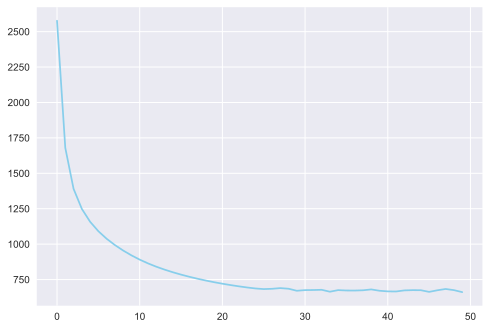

In [128]:
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
plt.style.use("seaborn")

# having a small number of training data
# backpropagation algorithm is simple batch gradient descent
# iterate for 50 epochs
n_iter = 50
learning_rate = 0.05

# caching the value of the cross entropy error function in a history list
history = [backward(model, X, y, learning_rate) for _ in range(n_iter)]

# plot cross entropy loss of all epochs to get a better sense of whether the training worked properly.
plt.plot(range(len(history)), history, color="skyblue")
plt.show()

In [131]:
# context token prediction given any token from the vocabulary
learning = one_hot_encode(word_to_id["learning"], len(word_to_id))
result = forward(model, [learning], return_cache=False)[0]

for word in (id_to_word[id] for id in np.argsort(result)[::-1]):
    print(word)

algorithms
machine
is
so
intelligence
the
are
build
it
perform
artificial
on
develop
tasks
needed
learning
variety
study
as
that
a
training
such
based
known
in
and
mathematical
of
difficult
do
through
order
automatically
where
used
conventional
filtering
experience
subset
sample
infeasible
seen
vision
explicitly
computer
programmed
to
improve
model
data
or
wide
email
applications
predictions
make
being
without
decisions


### Embedding

- The key behind word embeddings is that the rows of the first weight matrix is effectively a dense representation of one-hot encoded vectors each corresponding to various tokens in the text dataset.

In [135]:
model['w1']

array([[-3.73787767e-01,  3.36169382e-01,  1.14621230e+00,
         1.64268005e+00, -1.02371370e+00, -1.30258587e+00,
        -1.05832901e+00, -5.72130872e-01,  5.65358225e-02,
         1.67706966e+00],
       [-1.38634914e+00,  1.60274890e+00,  2.06490623e-01,
         1.33788465e+00, -1.44407796e+00,  9.89225027e-01,
         3.98280625e-03,  1.80069387e+00, -3.53684956e-01,
         1.01615431e+00],
       [ 2.78494579e-01, -1.43989877e-01,  1.43282239e+00,
        -2.38911723e-01, -2.17936205e+00, -1.91756775e-01,
         4.33807950e-01,  7.68090439e-03,  3.21719505e-01,
         2.44083825e+00],
       [ 2.34819071e-01, -9.81494243e-01, -1.50289071e-01,
         2.69106887e+00, -7.93750150e-01,  2.19999779e+00,
         1.75970260e+00,  2.17729287e-01,  1.23816955e-01,
         1.20284482e+00],
       [-9.49813456e-01, -1.38300455e+00, -1.01546400e+00,
        -7.01667421e-01, -2.81650965e-01, -1.18741900e+00,
        -7.34540578e-01, -7.46043656e-01,  3.64173691e-01,
        -1.

In [136]:
# input a word through a function and receive as output the embedding vector for that given word
def get_embedding(model, word):
    try:
        idx = word_to_id[word]
    except KeyError:
        print(f"!!!!!! '{word}' word not in corpus")
    one_hot = one_hot_encode(idx, len(word_to_id))
    return forward(model, one_hot)["a1"]

In [140]:
# passing a word with the model to get its embedded vector
get_embedding(model, "machine")

array([-1.06572584, -1.12636658,  0.14901178, -0.19554754,  0.3194923 ,
        0.56187587,  0.34095945, -0.07995324,  0.67406589, -0.84688968])

- Output embedding is a dense ten-dimensional vector as expected.
- This vector is not a collection of some randomly initialized numbers, but a result of training with context data generated through the sliding window algorithm described above